<a href="https://colab.research.google.com/github/aronnly/Dados_do_Airbnb/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="50%" src="https://notaalta.espm.br/wp-content/uploads/2018/04/airbnb_paris.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-01-08/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificacao do imovel
* `name` - nome da propriedade 
* `host_id` - número gerado para identificar o host
* `host_name` - nome do host
* `neighbourhood_group` - nenhum valor valido
* `neighbourhood` - nome do bairro
* `latitude`
* `longitude`
* `room_type` - tipo de locação
* `price` - preço
* `minimum_nights` - número mínimo de noites contratadas
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação
* `reviews_per_month` - número de avaliações por mês
* `calculated_host_listings_count` - quantidade de imoveis do mesmo host
* `availability_365` - disponibilidade por ano


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,80,2,277,2022-01-04,1.82,1,66,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,290,2021-12-30,2.21,4,212,20,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,365,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,148,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,80,4,34,2021-12-28,0.32,1,212,8,7511101582862


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame

print("O numero de entradas é {}, divididas em {} variaveis".format(df.shape[0],df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

O numero de entradas é 49255, divididas em 18 variaveis


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(pd.isna(df).sum()/df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.427936
reviews_per_month                 0.208182
last_review                       0.208182
name                              0.000873
host_name                         0.000568
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

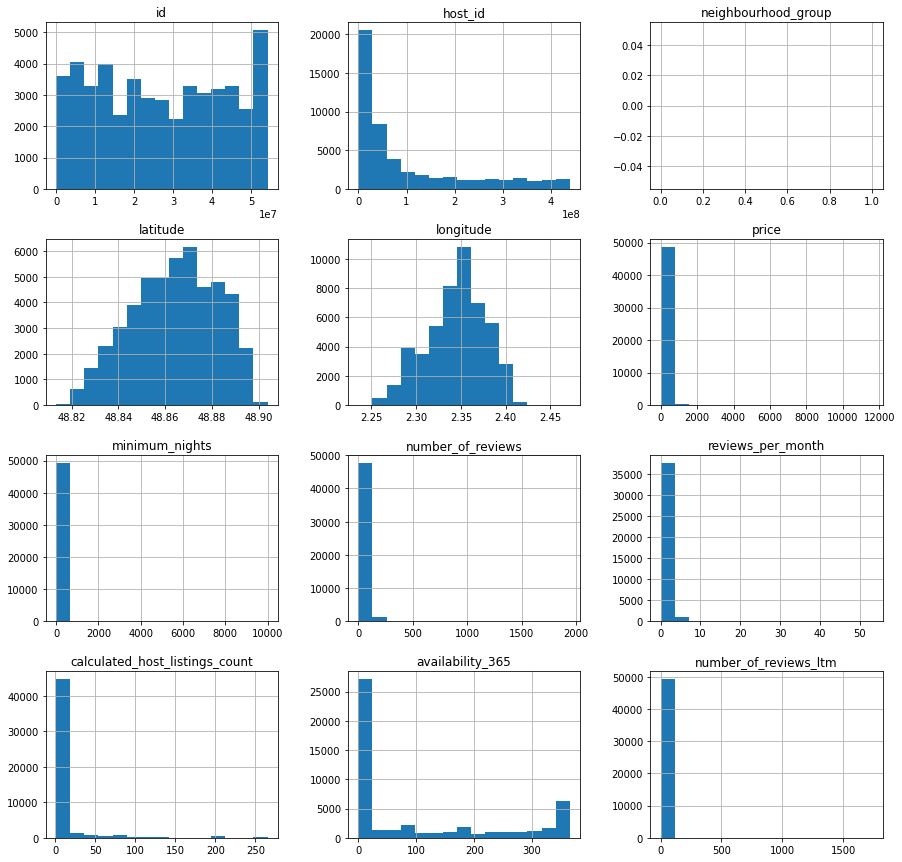

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize = (15,15));

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver a média da coluna `price``
print("A media de precos é de EUR {:.2f}".format(df.price.mean()))

A media de precos é de EUR 128.66


### **Q4. Qual a correlação existente entre as variáveis**

In [8]:
# criar uma matriz de correlação
df_new = df.drop(columns = "neighbourhood_group") #retirei essa coluna porque estava dando muitos erros em virtude dos NaN
df_new.corr()
# mostrar a matriz de correlação


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.538699,0.008394,-0.054441,0.064711,-0.248388,-0.267943,0.260665,0.178963,0.218317,0.086890
host_id,0.538699,1.000000,-0.037598,-0.092047,0.061196,-0.183751,-0.110545,0.210606,0.147259,0.238190,0.086978
latitude,0.008394,-0.037598,1.000000,0.084694,-0.013512,0.025923,-0.027191,-0.021483,-0.027130,-0.038257,-0.016396
longitude,-0.054441,-0.092047,0.084694,1.000000,-0.098558,0.001451,0.003859,-0.030998,-0.050802,-0.102773,-0.006598
price,0.064711,0.061196,-0.013512,-0.098558,1.000000,-0.070912,-0.014172,0.011112,0.118876,0.150990,-0.007378
minimum_nights,-0.248388,-0.183751,0.025923,0.001451,-0.070912,1.000000,-0.196302,-0.275290,-0.130412,-0.238912,-0.180644
number_of_reviews,-0.267943,-0.110545,-0.027191,0.003859,-0.014172,-0.196302,1.000000,0.615571,-0.025327,0.159338,0.560078
reviews_per_month,0.260665,0.210606,-0.021483,-0.030998,0.011112,-0.275290,0.615571,1.000000,0.085985,0.284227,0.731084
calculated_host_listings_count,0.178963,0.147259,-0.027130,-0.050802,0.118876,-0.130412,-0.025327,0.085985,1.000000,0.198533,0.045031
availability_365,0.218317,0.238190,-0.038257,-0.102773,0.150990,-0.238912,0.159338,0.284227,0.198533,1.000000,0.175807


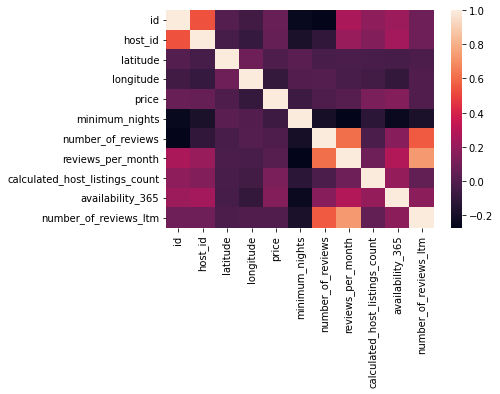

In [9]:
# plotar um heatmap a partir das correlações
matriz_de_correlacao = df_new.corr()
sns.heatmap(matriz_de_correlacao);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [10]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    40732
Private room        7057
Hotel room          1148
Shared room          318
Name: room_type, dtype: int64

In [11]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_imovel_disponivel = df.room_type.value_counts()
df.room_type.value_counts()/df_imovel_disponivel.sum()

Entire home/apt    0.826962
Private room       0.143275
Hotel room         0.023307
Shared room        0.006456
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [12]:
# ver preços por bairros, na média
df.groupby('neighbourhood')["price"].mean().sort_values(ascending = False)


neighbourhood
Élysée                 239.653351
Passy                  189.133716
Bourse                 182.177354
Luxembourg             181.993699
Palais-Bourbon         181.451353
Louvre                 179.609206
Hôtel-de-Ville         166.325526
Temple                 165.626621
Panthéon               140.461050
Opéra                  137.684417
Batignolles-Monceau    126.522933
Observatoire           119.781535
Vaugirard              118.022843
Entrepôt               116.391478
Popincourt              99.667183
Buttes-Montmartre       94.854583
Reuilly                 94.017751
Gobelins                88.506052
Buttes-Chaumont         83.087932
Ménilmontant            80.751301
Name: price, dtype: float64

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [16]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

107.98952390620242

In [13]:
# plotar os imóveis pela latitude-longitude


Serão considerados `x=longitude` e `y=latitude`

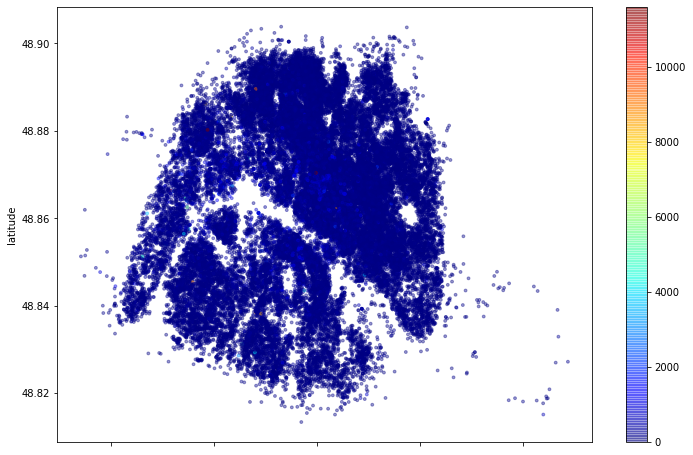

In [25]:
df.plot(kind="scatter", x='longitude', y='latitude',alpha=0.4, c= df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões
